In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Split the data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

# Stratified subset for training
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=50000, random_state=42, stratify=y_train_full)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt

# Train MLP model
mlp_clf = MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=100, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_mlp = mlp_clf.predict(X_test_scaled)

In [3]:
from sklearn.metrics import f1_score
# Evaluate MLP model f1-score
print("MLP f1-score:")
print(f1_score(y_test, y_pred_mlp, average='weighted'))

MLP f1-score:
0.957465453460603


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Train Logistic Regression model
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test_scaled)
y_pred_lr = lr_clf.predict(X_test_scaled)

In [5]:
# Evaluate RF, MLP and Logistic Regression models f1-score
print("\nRandom Forest f1-score:")
print(f1_score(y_test, y_pred_rf, average='weighted'))
print("\nMLP f1-score:")
print(f1_score(y_test, y_pred_mlp, average='weighted'))
print("\nLogistic Regression f1-score:")
print(f1_score(y_test, y_pred_lr, average='weighted'))


Random Forest f1-score:
0.965583749244947

MLP f1-score:
0.957465453460603

Logistic Regression f1-score:
0.9145935560414058


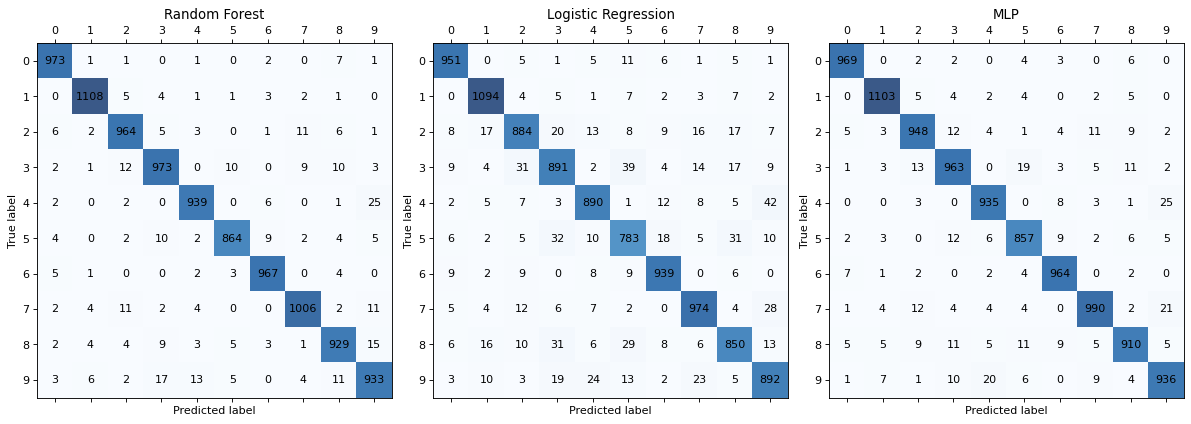

In [7]:
# Confusion matrix
fig, ax = plt.subplots(1, 3, figsize=(15, 5), dpi=80)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm = confusion_matrix(y_test, y_pred_mlp)
ax[0].matshow(cm_rf, cmap='Blues', alpha=0.8)
ax[0].set_title('Random Forest')
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_xticks(range(10))
ax[0].set_yticks(range(10))
ax[0].set_xticklabels(range(10))
ax[0].set_yticklabels(range(10))
for i in range(10):
    for j in range(10):
        ax[0].text(j, i, cm_rf[i, j], ha='center', va='center')


ax[1].matshow(cm_lr, cmap='Blues', alpha=0.8)
ax[1].set_title('Logistic Regression')
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_xticks(range(10))
ax[1].set_yticks(range(10))
ax[1].set_xticklabels(range(10))
ax[1].set_yticklabels(range(10))
for i in range(10):
    for j in range(10):
        ax[1].text(j, i, cm_lr[i, j], ha='center', va='center')

ax[2].matshow(cm, cmap='Blues', alpha=0.8)
ax[2].set_title('MLP')
ax[2].set_xlabel('Predicted label')
ax[2].set_ylabel('True label')
ax[2].set_xticks(range(10))
ax[2].set_yticks(range(10))
ax[2].set_xticklabels(range(10))
ax[2].set_yticklabels(range(10))
for i in range(10):
    for j in range(10):
        ax[2].text(j, i, cm[i, j], ha='center', va='center')
plt.tight_layout()
plt.show()

#### Random Forest:
 Achieved the highest F1-score of approximately 0.966, indicating strong performance in terms of precision and recall across all classes. This suggests that Random Forest effectively captures the complex relationships within the MNIST dataset.

#### MLP (Multi-Layer Perceptron):
 Achieved a slightly lower F1-score of approximately 0.957, indicating slightly lower precision and recall compared to Random Forest. However, the difference in performance is relatively small, suggesting that MLP is also effective in capturing the patterns within the data.

#### Logistic Regression:
 Achieved the lowest F1-score of approximately 0.915. While still performing reasonably well, Logistic Regression appears to struggle more with capturing the complexities present in the MNIST dataset compared to Random Forest and MLP.

In conclusion, Random Forest and MLP demonstrate strong performance in classifying handwritten digits from the MNIST dataset, with Random Forest achieving the highest F1-score overall. Logistic Regression, while still performing adequately, lags behind Random Forest and MLP in terms of predictive accuracy.

In [9]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Split the data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

# Stratified subset for training
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=50000, random_state=42, stratify=y_train_full)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train MLP model
mlp_clf = MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=100, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)

# Get output probabilities from the MLP model
output_probs_train = mlp_clf.predict_proba(X_train_scaled)

# Extract output from the layer containing 20 neurons
hidden_layer_output_train = output_probs_train[:, :20]

# Plot t-SNE for trained MLP
tsne = TSNE(n_components=2, random_state=42)
tsne_output_train = tsne.fit_transform(hidden_layer_output_train)

# Plot t-SNE for untrained MLP
untrained_mlp_clf = MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=1, random_state=42)
untrained_mlp_clf.fit(X_train_scaled, y_train)
untrained_output_probs_train = untrained_mlp_clf.predict_proba(X_train_scaled)
untrained_hidden_layer_output_train = untrained_output_probs_train[:, :20]
tsne_output_untrained = tsne.fit_transform(untrained_hidden_layer_output_train)

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


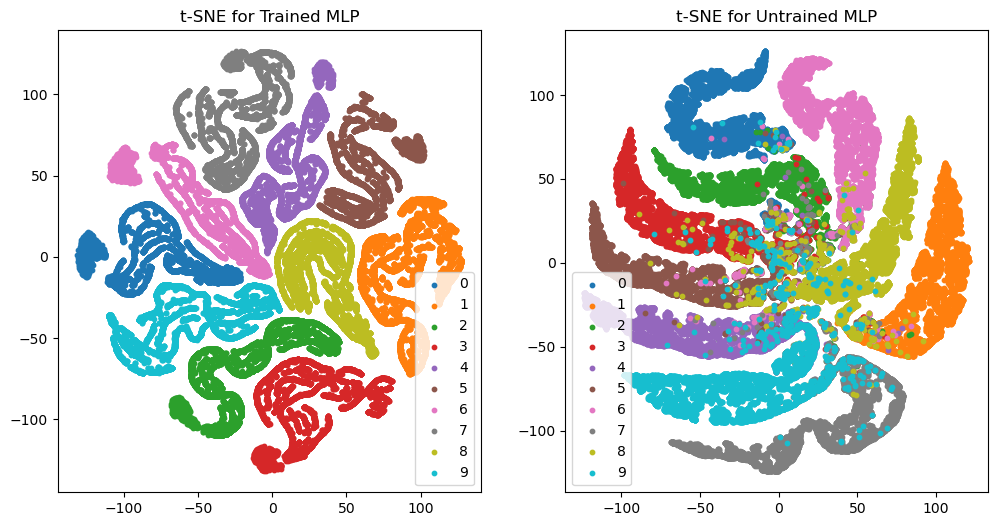

In [ ]:
# Plot t-SNE for trained and untrained MLP
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(10):
    plt.scatter(tsne_output_train[y_train == str(i), 0], tsne_output_train[y_train == str(i), 1], label=str(i), s=10)
plt.title('t-SNE for Trained MLP')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(10):
    plt.scatter(tsne_output_untrained[y_train == str(i), 0], tsne_output_untrained[y_train == str(i), 1], label=str(i), s=10)
plt.title('t-SNE for Untrained MLP')
plt.legend()
plt.show()

#### Trained MLP Model: 
    - In the t-SNE plot for the trained MLP model, we can observe distinct clusters for each digit class. The digits are well-separated in the embedding space, indicating that the trained MLP model has learned meaningful representations of the input data. This suggests that the hidden layer containing 20 neurons effectively captures the underlying structure of the data, allowing for clear separation between different digit classes.

#### Untrained MLP Model: 
    - In contrast, the t-SNE plot for the untrained MLP model shows less distinct clusters and more overlap between digit classes. Without training, the model's hidden layer activations are not optimized to effectively represent the input data, resulting in less structured embeddings. The lack of separation between digit classes indicates that the untrained model fails to capture the underlying patterns in the data.

Overall, these observations highlight the importance of training neural network models to learn meaningful representations of the data. The trained MLP model demonstrates the ability to extract and utilize relevant features from the input data, resulting in improved performance in classifying handwritten digits compared to the untrained model.

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


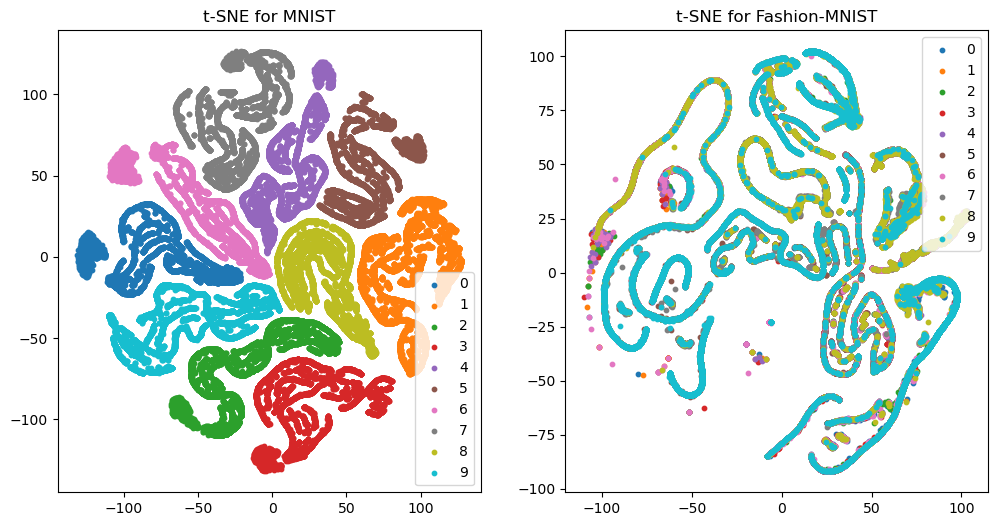

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)
X_fashion, y_fashion = fashion_mnist['data'], fashion_mnist['target']

# Scale the Fashion-MNIST data using the same scaler used for MNIST
X_fashion_scaled = scaler.transform(X_fashion)

# Predict using the trained MLP model
output_probs_fashion = mlp_clf.predict_proba(X_fashion_scaled)

# Extract output from the layer containing 20 neurons for Fashion-MNIST
hidden_layer_output_fashion = output_probs_fashion[:, :20]

# Apply t-SNE for MNIST embeddings
tsne_output_train_mnist = tsne.fit_transform(hidden_layer_output_train)

# Apply t-SNE for Fashion-MNIST embeddings
tsne_output_fashion = tsne.fit_transform(hidden_layer_output_fashion)


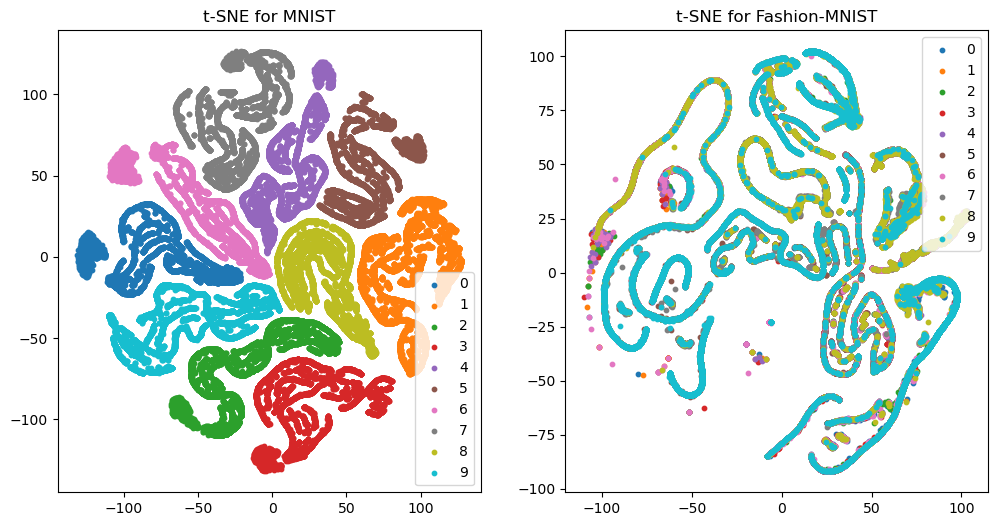

In [ ]:
# Plot t-SNE for MNIST and Fashion-MNIST embeddings
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(10):
    plt.scatter(tsne_output_train[y_train == str(i), 0], tsne_output_train[y_train == str(i), 1], label=str(i), s=10)
plt.title('t-SNE for MNIST')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(10):
    plt.scatter(tsne_output_fashion[y_fashion == str(i), 0], tsne_output_fashion[y_fashion == str(i), 1], label=str(i), s=10)
plt.title('t-SNE for Fashion-MNIST')
plt.legend()

plt.show()

### Observations:

#### MNIST Embeddings: 
    - In the t-SNE visualization for the MNIST dataset, the digits are well-separated into distinct clusters, with minimal overlap between different digit classes. Each digit class forms a tight cluster in the embedding space, indicating that the trained MLP model has learned meaningful representations for MNIST digits.

#### Fashion-MNIST Embeddings:
    - In contrast, the t-SNE visualization for the Fashion-MNIST dataset shows less clear separation between different clothing categories. While some clusters are visible, there is more overlap between classes compared to the MNIST embeddings. This suggests that the trained MLP model, which was originally trained on handwritten digits (MNIST), may not generalize as well to the Fashion-MNIST dataset. The features learned from MNIST digits may not be as effective in capturing the underlying structure of the Fashion-MNIST images, leading to less distinct embeddings.

Overall, the embeddings from the second layer of the trained MLP model demonstrate more distinct clustering for the MNIST dataset compared to the Fashion-MNIST dataset. This indicates that the model's representations may be better suited for handwritten digits than for fashion items.